## Anova (Analysis of Variance)

ANOVA is a statistical method for making multiple group comparisons. 
It provides an easy way to eliminate variables that contribute little in predicting the dependent variable. 
ANOVA tests the features in general rather than specific differences in the mean of the features. 
In this notebook, we will focus on one way ANOVA. 
In one way ANOVA, we will compare the effects of a single independent variable. 

It is called analysis of variance because it involves taking the entire variance 
in a dataset and divides the source of variance into different components. 
Each individual score is the product of the mean of the population, 
the effects of the independent variable, and random error.

There are three components of variance. 
**Total variance** is the variance of all subjects regardless of the group to which they belong. 
Total variance is further partitioned in to **between-groups variance** and **within-groups variance**. 
Between-groups variance is the index of differences among group means due to the effects 
of the independent variable and random error. 
It represents the variance between the group’s means. 
Within-groups variance represents the differences among subjects in groups due to random error. 
It represents the variance among subjects within each group of the experiment. 
The variance for both between-groups and within-groups is computed as their sum of squares.

 

The F-ratio metric determines if differences among group means are due to random variation 
or if the differences are due to nonchance. 
It is expressed as

$$F = \frac{between-group variance}{within-group variance}$$

Anova helps to determine whether the means from more than two populations or groups are equal or not. 
In another words whether the difference in means is statistically significant or not. 
If the ANOVA F-test shows there is a significant difference in means between the groups we may 
want to perform multiple comparisons between all pair-wise means to determine how they differ.

Let's analyze the auto miles per gallon dataset to find how variables are similar are dissimilar to each other.

Load the auto-mpg dataset from '/dsa/data/all_datasets/auto-mpg/' ...

In [1]:
auto_data=read.csv("/dsa/data/all_datasets/auto-mpg/auto-mpg.csv")
head(auto_data)

mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [2]:
str(auto_data)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?    ","100.0",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


### One way between ANOVA

Frame null hypothesis as

$H_0$:  No significant difference exist in miles per gallon among vehicles of different origin

$H_1$:  Significant difference exist in miles per gallon among vehicles of different origin

Use `aov()` function in R to test the null hypothesis to figure out whether to reject or fail to reject the null hypothesis.

Let's plot a graph to compare the means of mpg across groups. The independent variable should be a factor to create group wise plots. So, let's convert the variable origin into a factor. 

In [3]:
auto_data$origin=as.factor(auto_data$origin)

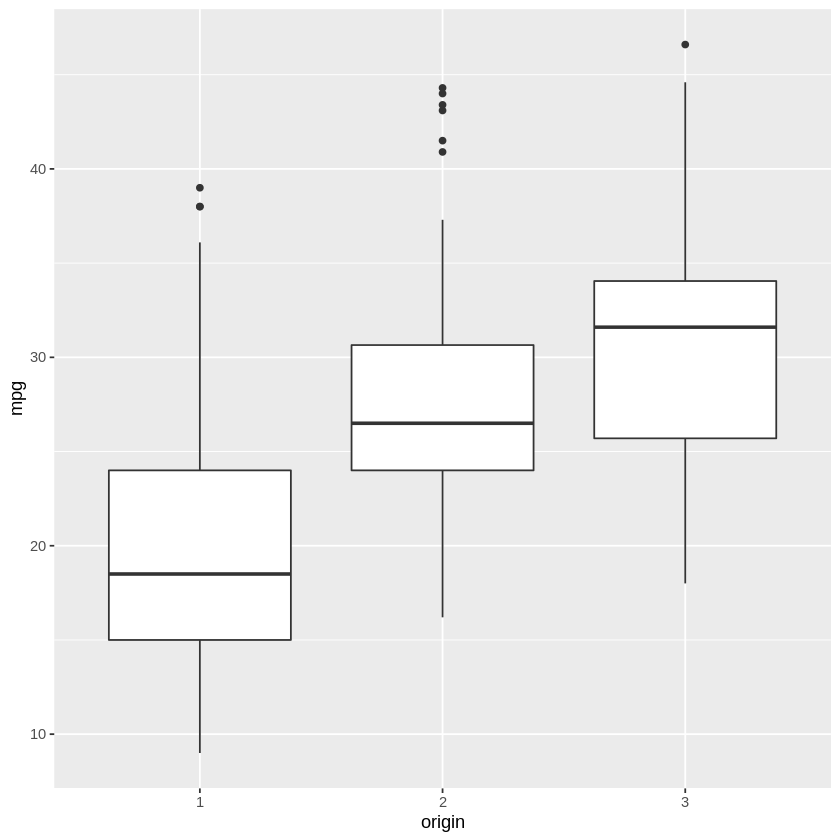

In [4]:
library(ggplot2)
ggplot(auto_data,aes(origin,mpg))+geom_boxplot()

From the plot it appears that the average mpg for vehicles from origin 3 is higher compared to other origins. Origin 1 has the lowest average mpg.

In [5]:
# General form for aov() is aov(response ~ factor, data=data_name)
# where response represents the response variable and factor the variable 
# that separates the data into groups. 
# Both variables should be contained in the dataframe called data_name.

fit <- aov(mpg ~ origin, data=auto_data)
summary(fit)

             Df Sum Sq Mean Sq F value Pr(>F)    
origin        2   8073    4036   98.54 <2e-16 ***
Residuals   395  16180      41                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [6]:
# Read API documentation
help(aov)

According to the above results the F-statistic is 98.54 with a p-value almost equal to 0.
The null hypothesis that "no significant difference exist in miles per gallon among 
vehicles of different origin" can be clearly rejected.

In [7]:
# Show the means
# model.tables() computes summary tables for model fits, especially complex aov fits.
# type = "means" give tables of the mean response for each combinations of levels of the factors in a term.
model.tables(fit, "means")

Tables of means
Grand mean
         
23.51457 

 origin 
         1     2     3
     20.08 27.89 30.45
rep 249.00 70.00 79.00

The function above gave an average mpg for 3 groups.

In [8]:
help(model.tables)

### Two way between ANOVA

Can we test if `mpg` is explained by `origin`, `horsepower` and _also by the interaction between them_.

In [9]:
# Two Way Factorial Design 

# Independent variable: origin
# Independent variable: horsepower
# Dependent variable: mpg

# There are two different ways of performing 2-way anova. 
# Note: The formula for the model
fit2 <- aov(mpg ~ origin*horsepower, data=auto_data)
summary(fit2)

                   Df Sum Sq Mean Sq F value  Pr(>F)    
origin              2   8073    4036 312.257 < 2e-16 ***
horsepower         93  11854     127   9.861 < 2e-16 ***
origin:horsepower  38    913      24   1.858 0.00273 ** 
Residuals         264   3413      13                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Note:** 
The formula in the model is combining terms using the __`*`__ symbol instead of the __`+`__ as we saw in regression and classification.

```R
mpg ~ origin*horsepower
```

### Multiple comparisons

The ANOVA F-test tells whether there are significant differences in the K population means.
It does not tell us anything about how they differ. 
The `pairwise.t.test` function computes the pair-wise comparisons between group means with corrections for multiple testing. Its usage is: 

```R
pairwise.t.test(reponse, 
                factor, p.adjust = method, 
                alternative = c("two.sided","less", "greater")
                )
```


Here, `p.adjust` is the correction method (e.g., “Bonferroni”).


In [10]:
help(pairwise.t.test)

In [11]:
str(auto_data)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?    ","100.0",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


In [12]:
pairwise.t.test(auto_data$mpg, auto_data$origin,p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  auto_data$mpg and auto_data$origin 

  1      2    
2 <2e-16 -    
3 <2e-16 0.046

P value adjustment method: bonferroni 

The above table shows there is a good difference in means between 
origins 2 and 3 with a p-value of 0.046, 
but both are significantly different from origin 1 with p-values almost equal to 0. 
We can confidently say that the average mpg is significantly different for origin 1.

##### Tukey's Method

Tukey's method also known as _Tukey's Honest Significant Differences test_ is another multiple comparisons procedure. 
`TukeyHSD()` creates a set of confidence intervals on the differences between means with 
the specified family-wise probability of coverage. 
The general form is `TukeyHSD(x, conf.level = 0.95)` where **x** is a fitted model object.

In [13]:
Tukey = TukeyHSD(fit, conf.level = 0.95)
Tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mpg ~ origin, data = auto_data)

$origin
         diff        lwr       upr     p adj
2-1  7.807894 5.77095169  9.844837 0.0000000
3-1 10.367099 8.42283190 12.311366 0.0000000
3-2  2.559204 0.08769223  5.030716 0.0404341


In [14]:
help(TukeyHSD)

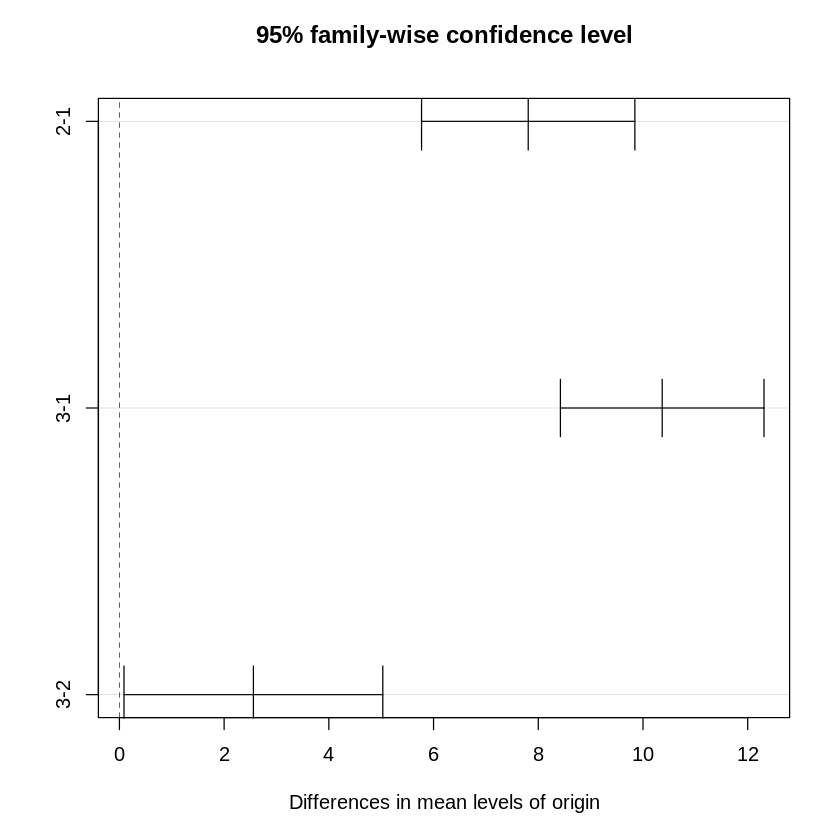

In [15]:
#  graphical representation of the multiple confidence intervals
plot(Tukey)

The above results show that 2-1 and 3-1 differences are significant with p-values equal to zero, 
while 3-2 difference is large with p=0.04.

### ANOVAs with _within-subjects_ variables


#### One-way within ANOVA

Here we will generate test data for testing _within-subjects_ ANOVA.

In [16]:
# this is a code defined table
groceries = read.table(header=TRUE,text='
subject            storeA  storeB  storeC  storeD
lettuce              1.17    1.78    1.29    1.29
potatoes             1.77    1.98    1.99    1.99
milk                 1.49    1.69    1.79    1.59
eggs                 0.65    0.99    0.69    1.09
bread                1.58    1.70    1.89    1.89
cereal               3.13    3.15    2.99    3.09
ground.beef          2.09    1.88    2.09    2.49
tomato.soup          0.62    0.65    0.65    0.69
laundry.detergent    5.89    5.99    5.99    6.99
aspirin              4.46    4.84    4.99    5.15')

In [17]:
head(groceries)

subject,storeA,storeB,storeC,storeD
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
lettuce,1.17,1.78,1.29,1.29
potatoes,1.77,1.98,1.99,1.99
milk,1.49,1.69,1.79,1.59
eggs,0.65,0.99,0.69,1.09
bread,1.58,1.70,1.89,1.89
cereal,3.13,3.15,2.99,3.09


In [18]:
str(groceries)

'data.frame':	10 obs. of  5 variables:
 $ subject: Factor w/ 10 levels "aspirin","bread",..: 7 9 8 4 2 3 5 10 6 1
 $ storeA : num  1.17 1.77 1.49 0.65 1.58 3.13 2.09 0.62 5.89 4.46
 $ storeB : num  1.78 1.98 1.69 0.99 1.7 3.15 1.88 0.65 5.99 4.84
 $ storeC : num  1.29 1.99 1.79 0.69 1.89 2.99 2.09 0.65 5.99 4.99
 $ storeD : num  1.29 1.99 1.59 1.09 1.89 3.09 2.49 0.69 6.99 5.15


For performing within-subjects ANOVA with a variable, 
the data should be in long format. Why?

Because the response variable in this case is the `price` of the items which is 
listed in four columns (**wide format**). 
Each of these variables needs to be in ONE column (**long format**) of the data frame 
in order to use the `aov()` function.

The data above is in wide format, so we have to convert it to long format first. 
Also, for there must be an identifier column for within-subjects ANOVA. 
In this case, it is subject. 
This identifier variable must be a factor.

In [19]:
groceries_stacked = stack(groceries)     # Stack the variables StoreA, storeB, storeC and store D
groceries_stacked$subject = rep(rownames(groceries), 4)    # create the "subject" variable and repeat the names of groceries
                                                           # 4 times for 4 store variables stacked.
groceries_stacked$subject = factor(groceries_stacked$subject)            # Convert subject variable to a factor.
colnames(groceries_stacked) = c("price", "store", "subject")  # Gives names to the columns of dataframe groceries_stacked 

Warning message in stack.data.frame(groceries):
“non-vector columns will be ignored”

In [20]:
help(stack)

In [21]:
head(groceries_stacked)

price,store,subject
<dbl>,<fct>,<fct>
1.17,storeA,1
1.77,storeA,2
1.49,storeA,3
0.65,storeA,4
1.58,storeA,5
3.13,storeA,6


Now that we have the prices of all groceries stacked in a column, 
we can answer the question of which store we should shop at.

In [22]:
with(groceries_stacked, t(tapply(price, store, sum)))

storeA,storeB,storeC,storeD
22.85,24.65,24.36,26.26


For the items in the sample, `storeA` had the lowest prices. 
We have to generalize our assertion that this price difference from `storeA` holds up in general.
An error term should be supplied, that reflects the fact that the "treatments are nested within subjects.", 
that is the "store" effect within each, and where every "subject" (grocery item) can be seen.

In [23]:
aov_within = aov(price ~ store + Error(subject/store), data=groceries_stacked)
summary(aov_within)


Error: subject
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  115.2    12.8               

Error: subject:store
          Df Sum Sq Mean Sq F value Pr(>F)  
store      3 0.5859 0.19529   4.344 0.0127 *
Residuals 27 1.2137 0.04495                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [24]:
# Revisit the aov documentation and review the use of the Error() 
help(aov)

The p-value of __0.0127__ suggests the prices in stores are different. 
Store and subject are the sources of variability. 
We are interested in the effect of "store". 
This variable effect is visible within each subject, i.e. nested within each subject. 
So the error term is "_subject/store_", which is read as "store within subject." 
Once all the "subject" variability is taken out we are left with the main effect that is from "store".

In [25]:
with(groceries_stacked, pairwise.t.test(x=price, g=store, p.adjust.method="none", paired=T))


	Pairwise comparisons using paired t tests 

data:  price and store 

       storeA storeB storeC
storeB 0.033  -      -     
storeC 0.035  0.695  -     
storeD 0.012  0.245  0.110 

P value adjustment method: none 

The `pairwise.t.test` suggests all stores have different prices and show some variation in the data. 

### Unequal Samples Sizes in Anova:

The only practical issue in one-way ANOVA is that very unequal sample sizes can affect the 
homogeneity of variance assumption.  
ANOVA is considered robust to moderate departures from this assumption, 
but the departure needs to stay smaller when the sample sizes are very different.  
According to Keppel (1993), there isn’t a good rule of thumb for the point at which 
unequal sample sizes make heterogeneity of variance a problem.

Real issues with unequal sample sizes do occur in factorial ANOVA, 
if the sample sizes are confounded in the two (or more) factors.  
For example, in a two-way ANOVA, 
let’s say that your two independent variables (factors) are age (young vs. old) and marital status (married vs. not).  
If there are twice as many young people as old and the young group has a much larger percentage of 
singles than the older group, the effect of marital status cannot be distinguished from the effect of age.

The effectiveness of the statistical test (sometimes referred to as _power_) is based on the smallest sample size, 
so while it doesn’t hurt power to have more observations in the larger group, it doesn’t help either.

#### The Problem of Confounding

Whether by design, accident, or necessity, the number of subjects in each of the conditions 
in an experiment may not be equal. 
For example, the sample sizes for the "Bias Against Associates of the Obese" case study are shown in Table 1. 
Although the sample sizes were approximately equal, the "Acquaintance Typical" condition had the most subjects. Since _n_ is used to refer to the sample size of an individual group, 
designs with unequal sample sizes are sometimes referred to as designs with unequal n.

<img src="../images/table_1.PNG">


We consider an absurd design to illustrate the main problem caused by unequal n. 

Suppose an experimenter were interested in the effects of diet and exercise on cholesterol. 
The sample sizes are shown in Table 2.

<img src="../images/table_2.PNG">

What makes this example absurd is that there are no subjects in either the 
"Low-Fat No-Exercise" condition or the "High-Fat Moderate-Exercise" condition. 
The hypothetical data showing change in cholesterol are shown in Table 3.

<img src="../images/table_3.PNG">

The last column shows the mean change in cholesterol for the two Diet conditions, 
whereas the last row shows the mean change in cholesterol for the two Exercise conditions. 
The value of -15 in the lower-right-most cell in the table is the mean of all subjects.

We see from the last column that those on the low-fat diet lowered their cholesterol an average of 25 units, 
whereas those on the high-fat diet lowered theirs by only an average of 5 units. 
However, there is no way of knowing whether the difference is due to diet or to exercise since every 
subject in the low-fat condition was in the moderate-exercise condition and every subject 
in the high-fat condition was in the no-exercise condition. 
Therefore, Diet and Exercise are completely confounded. 
The problem with unequal n is that it causes confounding.

#### Weighted and Unweighted Means

The difference between weighted and unweighted means is a difference critical for 
understanding how to deal with the confounding resulting from unequal n.

Weighted and unweighted means will be explained using the data shown in Table 4. 
Here, Diet and Exercise are confounded because 80% of the subjects in the low-fat 
condition exercised as compared to 20% of those in the high-fat condition. 
However, there is not complete confounding as there was with the data in Table 3.

The weighted mean for "Low Fat" is computed as the mean of the "Low-Fat Moderate-Exercise" 
mean and the "Low-Fat No-Exercise" mean, weighted in accordance with sample size.
To compute a weighted mean, you multiply each mean by its sample size and divide by N, 
the total number of observations. 
Since there are four subjects in the "Low-Fat Moderate-Exercise" condition and one 
subject in the "Low-Fat No-Exercise" condition, 
the means are weighted by factors of 4 and 1 as shown below, where $M_w$ is the weighted mean.

<img src="../images/a.PNG">

The weighted mean for the low-fat condition is also the mean of all five scores in this condition. 
Thus if you ignore the factor "Exercise," you are implicitly computing weighted means.

The unweighted mean for the low-fat condition ($M_u$) is simply the mean of the two means.

<img src="../images/b.PNG">

<img src="../images/table_4.PNG">

One way to evaluate the main effect of Diet is to compare the weighted mean for the 
low-fat diet (-26) with the weighted mean for the high-fat diet (-4). 
This difference of -22 is called "the effect of diet ignoring exercise" and is misleading since 
most of the low-fat subjects exercised and most of the high-fat subjects did not. 
However, the difference between the unweighted means of -15.625 (-23.750 minus -8.125) is not 
affected by this confounding and is therefore a better measure of the main effect. 
In short, weighted means ignore the effects of other variables (exercise in this example) and result in confounding; 
unweighted means control for the effect of other variables and therefore eliminate the confounding.



#### Types of Sums of Squares

In multi-factor ANOVA when there are unequal sample sizes the sum of squares total is not equal 
to the sum of the sums of squares for all the other sources of variation. 
This is because the confounded sums of squares are not apportioned to any source of variation. 
For the data in Table 4, the sum of squares for Diet is 390.625, the sum of squares for Exercise is 180.625, 
and the sum of squares confounded between these two factors is 819.375 
(the calculation of this value is beyond the scope of this discussion). 

In the ANOVA Summary Table shown in Table 5, this large portion of the sums of squares is not 
apportioned to any source of variation and represents the "missing" sums of squares. 
That is, if you add up the sums of squares for Diet, Exercise, D x E, and Error, you get 902.625. 
If you add the confounded sum of squares of 819.375 to this value, you get the total sum of squares of 1722.000. When confounded sums of squares are not apportioned to any source of variation, 
the sums of squares are called _Type III sums of squares_. 
Type III sums of squares are, by far, the most common and if sums of squares are not otherwise labeled, 
it can safely be assumed that they are Type III.

<img src="../images/table_5.PNG">

When all confounded sums of squares are apportioned to sources of variation, 
the sums of squares are called _Type I_ sums of squares. 
The order in which the confounded sums of squares are apportioned is determined 
by the order in which the effects are listed. 
The first effect gets any sums of squares confounded between it and any of the other effects. 
The second gets the sums of squares confounded between it and subsequent effects, 
but not confounded with the first effect, etc. 
The Type I sums of squares are shown in Table 6. 
As you can see, with Type I sums of squares, the sum of all sums of squares is the total sum of squares.

<img src="../images/table_6.PNG">

In _Type II_ sums of squares, sums of squares confounded between main effects are not apportioned to any source of variation,
whereas sums of squares confounded between main effects and interactions are apportioned to the main effects.
In our example, there is no confounding between the D x E interaction and either of the main effects. 
Therefore, the Type II sums of squares are equal to the Type III sums of squares.

#### Which Type of Sums of Squares to Use

Type I sums of squares allow the variance confounded between two main effects to be apportioned to one of the main effects. 
Unless there is a strong argument for how the confounded variance should be apportioned 
(which is rarely, if ever, the case), Type I sums of squares are not recommended.

There is not a consensus about whether Type II or Type III sums of squares is to be preferred. 
On the one hand, if there is no interaction, then Type II sums of squares will be more powerful for two reasons: 
(1) variance confounded between the main effect and interaction is properly assigned to the main effect and 
(2) weighting the means by sample sizes gives better estimates of the effects. 
To take advantage of the greater power of Type II sums of squares, 
some have suggested that if the interaction is not significant, then Type II sums of squares should be used. 
Maxwell and Delaney (2003) caution that such an approach could result in a Type II error in the test of the interaction. 
That is, it could lead to the conclusion that there is no interaction in the population when there really is one. This, in turn, would increase the Type I error rate for the test of the main effect. 
As a result, their general recommendation is to use Type III sums of squares.

Maxwell and Delaney (2003) recognized that some researchers prefer Type II sums of squares when there are strong 
theoretical reasons to suspect a lack of interaction and the p-value is much higher than the typical α level of 0.05. 
However, this argument for the use of Type II sums of squares is not entirely convincing. 
As Tukey (1991) and others have argued, it is doubtful that any effect, whether a main effect or an interaction, 
is exactly 0 in the population. 
Incidentally, Tukey argued that the role of significance testing is to determine whether a confident 
conclusion can be made about the direction of an effect, not simply to conclude that an effect is not exactly 0.

Finally, if one assumes that there is no interaction, then an ANOVA model with no interaction term should be used rather than Type II sums of squares in a model that includes an interaction term. 
(Models without interaction terms are beyond this course material).


There are situations in which Type II sums of squares are justified even if there is strong interaction. 
This is the case because the hypotheses tested by Type II and Type III sums of squares are different, 
and the choice of which to use should be guided by which hypothesis is of interest. 
Recall that Type II sums of squares weight cells based on their sample sizes whereas Type III sums of squares weight all cells the same. 
Consider Figure 1 which shows data from a hypothetical A(2) x B(2) design. 
The sample sizes are shown numerically and are represented graphically by the areas of the endpoints.

<img src="../images/figure_1.PNG">


First, let's consider the hypothesis for the main effect of B tested by the Type III sums of squares. 
Type III sums of squares weight the means equally and, for these data, the marginal means for b1 and b2 are equal:

<img src="../images/c.PNG">

Thus, there is no main effect of B when tested using Type III sums of squares. 
For Type II sums of squares, the means are weighted by sample size.

<img src="../images/d.PNG">


Since the weighted marginal mean for b2 is larger than the weighted marginal mean for b1, 
there is a main effect of B when tested using Type II sums of squares.

The Type II and Type III analyses are testing different hypotheses. 
First, let's consider the case in which the differences in sample sizes arise because in the sampling of intact groups, 
the sample cell sizes reflect the population cell sizes (at least approximately). 
In this case, it makes sense to weight some means more than others and conclude that there is a main effect of B. 
This is the result obtained with Type II sums of squares. 
However, if the sample size differences arose from random assignment, 
and there just happened to be more observations in some cells than others, 
then one would want to estimate what the main effects would have been with equal sample sizes and, 
therefore, weight the means equally. 
With the means weighted equally, there is no main effect of B, the result obtained with Type III sums of squares.

#### Unweighted Means Analysis

Type III sums of squares are tests of differences in unweighted means. 
However, there is an alternative method to testing the same hypotheses tested using Type III sums of squares. 
This method, _unweighted means analysis_, is computationally simpler than the standard method
but is an approximate test rather than an exact test. 
It is, however, a very good approximation in all but extreme cases. 
Moreover, it is exactly the same as the traditional test for effects with one degree of freedom. 



#### Causes of Unequal Sample Sizes

None of the methods for dealing with unequal sample sizes are valid if the experimental 
treatment is the source of the unequal sample sizes. 
Imagine an experiment seeking to determine whether publicly performing an embarrassing act 
would affect one's anxiety about public speaking. 
In this imaginary experiment, the experimental group is asked to reveal to a group of people 
the most embarrassing thing they have ever done. 
The control group is asked to describe what they had at their last meal. 
Twenty subjects are recruited for the experiment and randomly divided into two equal groups of 10, 
one for the experimental treatment and one for the control. 
Following their descriptions, subjects are given an attitude survey concerning public speaking. 
This seems like a valid experimental design. 
However, of the 10 subjects in the experimental group, four withdrew from the experiment 
because they did not wish to publicly describe an embarrassing situation. 
None of the subjects in the control group withdrew. 
Even if the data analysis were to show a significant effect, 
it would not be valid to conclude that the treatment had an effect because a likely alternative 
explanation cannot be ruled out; namely, 
subjects who were willing to describe an embarrassing situation differed from those who were not. 
Thus, the differential dropout rate destroyed the random assignment of subjects to conditions, 
a critical feature of the experimental design. 
No amount of statistical adjustment can compensate for this flaw.


reference: http://onlinestatbook.com/2/analysis_of_variance/unequal.html

Let's look at a dataset with unequal sample sizes...

In [26]:
#create a sample dataset with unequal sample sizes...
site1 <- c(34,25,27,31,26,34,21)
site2 <- c(33,35,31,31,42,33)
site3 <- c(17,30,30,26,32,28,26,29)
site4 <- c(28,33,31,27,32,33,40)

Data <- data.frame(
       Y=c(site1, site2, site3, site4),
       Site =factor(rep(c("site1", "site2", "site3", "site4"), times=c(length(site1), length(site2), length(site3), length(site4))))
       )

head(Data)
tail(Data)

Y,Site
<dbl>,<fct>
34,site1
25,site1
27,site1
31,site1
26,site1
34,site1


,Y,Site
,<dbl>,<fct>
23,33,site4
24,31,site4
25,27,site4
26,32,site4
27,33,site4
28,40,site4


In [27]:
#Let's run an ANOVA on the dataset with unequal sample sizes...
fm1 <- aov(Y~Site, data=Data)
anova(fm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Site,3,212.3452,70.78175,3.497108,0.03097911
Residuals,24,485.7619,20.24008,NA,NA


### Weighted Means

We can also calculate the weighted means of each site.

Weighted means take into account the correlation between factors that results 
from having groups with different sample sizes. 
A weighted mean is calculated by simply adding up all of the values and dividing by the total number of values. 
Consequently, we can easily derive the weighted means for each group using our subset(data, condition), 
when necessary, and mean(data) functions.

In [28]:
#use mean(data) to calculate the weighted means for each treatment group. 
#Since we created subsets above when we made our dataset, we don't have to use the subset function.
#site 1 weighted mean
mean(site1)
#site 2 weighted mean
mean(site2)
#site 3 weighted mean
mean(site3)
#site 4 weighted mean
mean(site4)

[1] 28.28571

[1] 34.16667

[1] 27.25

[1] 32

Remember that when applying weighted means, 
it is suggested that one uses Type I sums of squares (SS) in one's ANOVA (detailed above). 
Type I happens to be the default SS used in the standard anova(object) function in *R*. 

### Unweighted Means

Now let’s turn to using unweighted means, 
which essentially ignore the correlation between the independent variables that arise from unequal sample sizes. 
An unweighted mean is calculated by taking the average of the individual group means. 
Thus, we can derive our unweighted means by summing the means of each level of our independent 
variables and dividing by the total number of levels. 

In [29]:
#use mean(data) and subset(data, condition) to calculate the unweighted means for each treatment group
(mean(site1) + mean(site2) + mean(site3) + mean(site4)) / 4


[1] 30.4256

Remember, when applying unweighted means, it is suggested that we use Type III sums of squares (SS) (discussed above) in our ANOVA. 
Type III SS can be set using the `type` argument in the `Anova(mod, type)` function, 
which is a member of the `car` package.

In [30]:
install.packages("car")
library(car)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: carData


In [31]:
help(Anova)

In [32]:
# Recall above:  
#  fm1 <- aov(Y~Site, data=Data) # internally builds a linear model
fm2 <- lm(Y~Site, data=Data)
Anova(fm2, type="II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Site,212.3452,3,3.497108,0.03097911
Residuals,485.7619,24,NA,NA


In [33]:
Anova(fm2, type="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5600.5714,1,276.706990,1.118789e-14
Site,212.3452,3,3.497108,3.097911e-02
Residuals,485.7619,24,NA,NA


### Tests Supplimenting ANOVA:

The null hypothesis tested in a one-factor ANOVA is that all the population means are equal. 
Stated more formally,

<img src="../images/e.PNG">

where $H_0$ is the null hypothesis and $k$ is the number of conditions. 
When the null hypothesis is rejected, 
all that can be said is that at least one population mean is different from at least one other population mean.
The methods for doing more specific tests to described _all pairwise comparisons among means_ apply here. 
Keep in mind that these tests are valid whether or not they are preceded by an ANOVA.


#### Main Effects

As shown below, significant main effects in multi-factor designs can be followed up
in the same way as significant effects in one-way designs. 
Table 1 shows the data from an imaginary experiment with three levels of Factor A and two levels of Factor B.

<img src="../images/table1_2.PNG">


Table 2 shows the ANOVA Summary Table for these data. 
The significant main effect of A indicates that, in the population, 
at least one of the marginal means for A is different from at least one of the others.

<img src="../images/table2_2.PNG">

The Tukey HSD test can be used to test all pairwise comparisons among means in a one-factor 
ANOVA as well as comparisons among marginal means in a multi-factor ANOVA. 
The formula for the equal-sample-size case is shown below.

<img src="../images/f.PNG">


where $M_i$ and $M_j$ are marginal means, MSE is the mean square error from the ANOVA, 
and $n$ is the number of scores each mean is based upon. 
For this example, MSE = 1.847 and $n = 8$ because there are eight scores at each level of A. 

The degrees of freedom is equal to the degrees of freedom error. 
For this example, $df = 18$. 
The results of the Tukey HSD test are shown in Table 3. 
The mean for $A_1$ is significantly lower than the mean for $A_2$ and the mean for $A_3$. 
The means for $A_2$ and $A_3$ are not significantly different.

<img src="../images/table3_2.PNG">

Specific comparisons among means are also carried out much the same way as shown in the 
relevant section on testing means. The formula for L is

<img src="../images/g.PNG">



where $c_i$ is the coefficient for the $i^{th}$ marginal mean and $M_i$ is the $i^{th}$ marginal mean. 
For example, to compare $A_1$ with the average of $A_2$ and $A_3$, 
the coefficients would be 1, -0.5, -0.5. Therefore,

<img src="../images/h.PNG">

To compute $t$, use:

<img src="../images/i.PNG">

where MSE is the mean square error from the ANOVA and $n$ is the number of scores each 
marginal mean is based on (eight in this example). 
The degrees of freedom is the degrees of freedom error from the ANOVA and is equal to 18. 
We would find that the two-tailed probability value is 0.0005. 
Therefore, the difference between $A_1$ and the average of $A_2$ and $A_3$ is significant.

#### Returning to our auto_mpg data:


In [34]:
#
# Recall:  fit <- aov(mpg ~ origin, data=auto_data)
#
# Tukey Honestly Significant Differences
TukeyHSD(fit) # where fit comes from aov()

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mpg ~ origin, data = auto_data)

$origin
         diff        lwr       upr     p adj
2-1  7.807894 5.77095169  9.844837 0.0000000
3-1 10.367099 8.42283190 12.311366 0.0000000
3-2  2.559204 0.08769223  5.030716 0.0404341


#### Interactions

The presence of a significant interaction makes the interpretation of the results more complicated. 
Since an interaction implies that the simple effects are different, 
the main effect as the mean of the simple effects does not tell the whole story. 
This section discusses how to describe interactions, 
proper and improper uses of simple effects tests, and how to test components of interactions.

##### Describing Interactions

A crucial first step in understanding a significant interaction is constructing an interaction plot. 
Figure 1 shows an interaction plot from data presented in the section on Multi-Factor ANOVA.

<img src="../images/figure1_2.PNG">

The second step is to describe the interaction in a clear and understandable way. 
This is often done by describing how the simple effects differed. 
Since this should be done using as little jargon as possible, 
the expression "simple effect" need not appear in the description. 
An example is as follows:

The effect of Outcome differed depending on the subject's self-esteem. 
The difference between the attribution to self following success and the attribution to 
self following failure was larger for high-self-esteem subjects (mean difference = 2.50) 
than for low-self-esteem subjects (mean difference = -2.33).

No further analyses are helpful in understanding the interaction since the interaction 
means only that the simple effects differ. 
The interaction's significance indicates that the simple effects differ from each other, 
but provides no information about whether they differ from zero.


#### Simple Effect Tests

It is not necessary to know whether the simple effects differ from zero in order to understand 
an interaction because the question of whether simple effects differ from zero has nothing to 
do with interaction except that if they are both zero there is no interaction. 
It is not uncommon to see research articles in which the authors report that they analyzed 
simple effects in order to explain the interaction. 
However, this is not a valid approach since an interaction does not depend on the analysis of the simple effects.

However, there is a reason to test simple effects following a significant interaction. 
Since an interaction indicates that simple effects differ, it means that the main effects are not general. 
In the made-up example, the main effect of Outcome is not very informative, 
and the effect of outcome should be considered separately for high- and low-self-esteem subjects.
As will be seen, the simple effects of Outcome are significant and in opposite directions: 
Success significantly increases attribution to self for high-self-esteem subjects and 
significantly lowers attribution to self for low-self-esteem subjects. 
This is a very easy result to interpret.

--- 
How can the simple effects both be zero if they differ from each other significantly as tested by the interaction? The answer is that a non-significant simple effect does not mean that the simple effect is zero: 
The null hypothesis should not be accepted just because it is not rejected.

If neither simple effect is significant, the conclusion should be that the simple effects differ, 
and that at least one of them is not zero. 
However, no conclusion should be drawn about which simple effect(s) is/are not zero.


Another error that can be made by mistakenly accepting the null hypothesis is to conclude that 
two simple effects are different because one is significant and the other is not. 

Consider the results of an imaginary experiment in which the researcher hypothesized that 
addicted people would show a larger increase in brain activity following some treatment 
than would non-addicted people. 
In other words, the researcher hypothesized that addiction status and treatment would interact. 
The results shown in Figure 2 are very much in line with the hypothesis. 
However, the test of the interaction resulted in a probability value of 0.08, 
a value not quite low enough to be significant at the conventional 0.05 level. 
The proper conclusion is that the experiment supports the researcher's hypothesis, 
but not strongly enough to allow a confident conclusion.

<img src="../images/figure2_2.PNG">

Unfortunately, the researcher was not satisfied with such a weak conclusion and went on to test the simple effects. 
It turned out that the effect of Treatment was significant for the Addicted group (p = 0.02) 
but not significant for the Non-Addicted group (p = 0.09). 
The researcher then went on to conclude that since there is an effect of Treatment for the Addicted group 
but not for the Non-Addicted group, the hypothesis of a greater effect for the former than for the latter group is demonstrated. 
This is faulty logic, however, since it is based on accepting the null hypothesis that the simple 
effect of Treatment is zero for the Non-Addicted group just because it is not significant.



#### Components of Interaction 

Figure 3 shows the results of an imaginary experiment on diet and weight loss. 
A control group and two diets were used for both overweight teens and overweight adults.

<img src="../images/figure3_2.PNG">

The difference between Diet A and the Control diet was essentially the same for teens and adults, 
whereas the difference between Diet B and Diet A was much larger for the teens than it was for the adults. 
Over one portion of the graph the lines are parallel whereas over another portion they are not. 
It is possible to test these portions or components of interactions using the method of specific 
comparisons discussed previously. 
The test of the difference between Teens and Adults on the difference between Diets A and B 
could be tested with the coefficients shown in Table 4. 
Naturally, the same considerations regarding multiple comparisons and orthogonal comparisons 
that apply to other comparisons among means also apply to comparisons involving components of interactions.

<img src="../images/table4_2.PNG">

---
Now let's look a code example:
Again, constructing data with measurements of three sites.

In [35]:
site1 <- c(34,25,27,31,26,34,21)
site2 <- c(33,35,31,31,42,33,22)
site3 <- c(17,30,30,26,32,28,26)


In [36]:
Data <- data.frame(
       Y=c(site1, site2, site3),
       Site =factor(rep(c("site1", "site2", "site3"), times=c(length(site1), length(site2), length(site3))))
       )
str(Data)

'data.frame':	21 obs. of  2 variables:
 $ Y   : num  34 25 27 31 26 34 21 33 35 31 ...
 $ Site: Factor w/ 3 levels "site1","site2",..: 1 1 1 1 1 1 1 2 2 2 ...


In [37]:
help(interaction.plot)

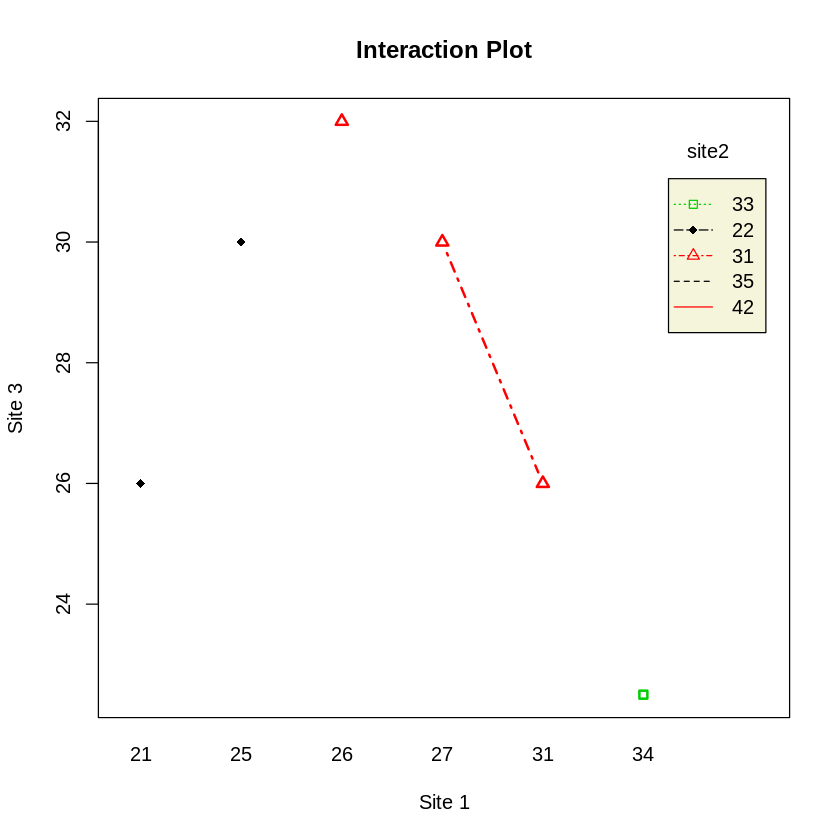

In [38]:
# Two-way Interaction Plot 

interaction.plot(site1, site2, site3, type="b", col=c(1:3), 
                 leg.bty="o", leg.bg="beige", lwd=2, pch=c(18,24,22),
                 xlab="Site 1",
                 ylab="Site 3", 
                 main="Interaction Plot")

We can also plot he means using using the `plotmeans` from the `gplots` library.
Please review the documentation from the API.

In [39]:
library(devtools)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/caTools/caTools_1.17.tar.gz"
install.packages(packageurl, repos=NULL, type="source")

In [40]:
# Plot Means with Error Bars
install.packages("gplots")
library(gplots)
help(plotmeans)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



Warning message in qt((1 + p)/2, ns - 1):
“NaNs produced”

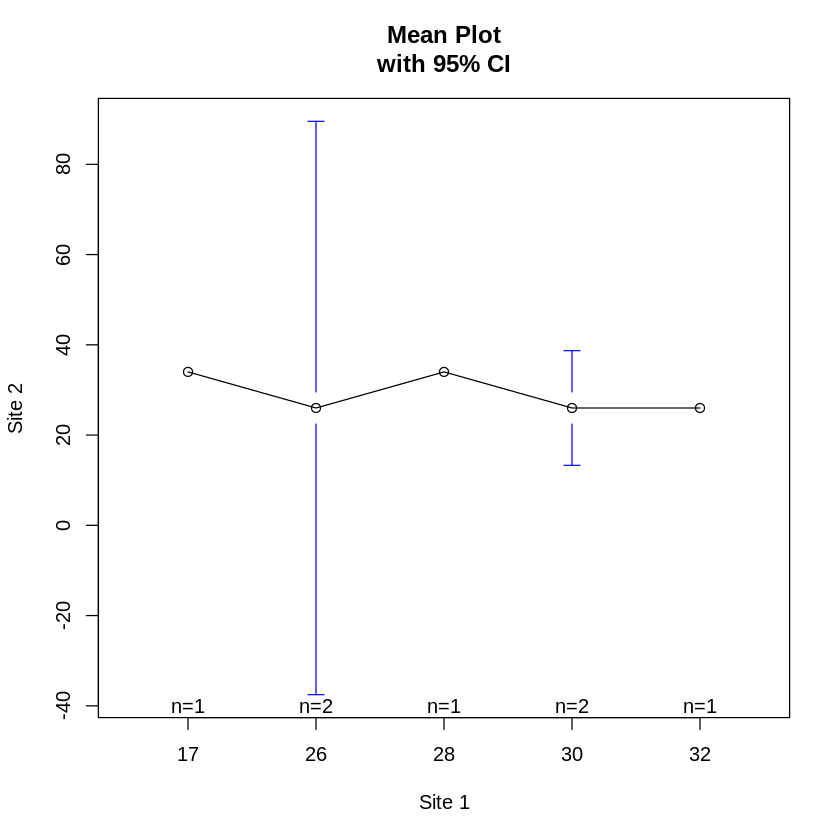

In [41]:
plotmeans(site1~site3,xlab="Site 1",
  ylab="Site 2", main="Mean Plot\nwith 95% CI")

--- 
This has been a whirlwind discussion of ANOVA techniques and discussions of interactions.
Please keep in mind that you may need to revisit this lab in the future to give the material a second pass.

# Save your notebook!